# 数据加载

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np

we = np.load('../data/we_(1665, 85).npy')
we_emb_matrix = np.load('../data/we_embedding_matrix_(6000, 300).npy')

label = np.load('../data/label_(1665, 85, 8).npy')

we.shape, we_emb_matrix.shape, label.shape

((1665, 85), (6000, 300), (1665, 85, 8))

# Plot Model

In [3]:
from TextCNN import TextCNN

model = TextCNN(max_sequence_length=85, embedding_matrix=we_emb_matrix).model
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 85)           0                                            
__________________________________________________________________________________________________
cwf_embedding (Embedding)       (None, 85, 300)      1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
max_sequence_repeat (Lambda)    (None, 85, 85, 300)  0           cwf_embedding[0][0]              
__________________________________________________________________________________________________
conv_window2 (TimeDistributed)  (None, 85, 84, 200)  120200      max_sequence_repeat[0][0]        
__________________________________________________________________________________________________
conv_windo

In [4]:
from keras.utils import plot_model

In [5]:
plot_model(model, './img/TextCNN.png', show_shapes=True)

# 模型训练

In [4]:
from train import train
from TextCNN import TextCNN





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


(1332, 85) (333, 85)
(1332, 85, 8) (333, 85, 8)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 85)           0                                            
__________________________________________________________________________________________________
cwf_embedding (Embedding)       (None, 85, 300)      1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
max_sequence_repeat (Lambda)    (None, 85, 85, 300)  0           cwf_embedding[0][0]       

Epoch 10/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.5027 - acc: 0.9763 - val_loss: 0.4882 - val_acc: 0.9763
Epoch 11/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.4768 - acc: 0.9763 - val_loss: 0.4636 - val_acc: 0.9763
Epoch 12/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.4527 - acc: 0.9763 - val_loss: 0.4411 - val_acc: 0.9763
Epoch 13/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.4304 - acc: 0.9763 - val_loss: 0.4204 - val_acc: 0.9763
Epoch 14/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.4100 - acc: 0.9763 - val_loss: 0.4014 - val_acc: 0.9763
Epoch 15/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.3918 - acc: 0.9763 - val_loss: 0.3838 - val_acc: 0.9763
Epoch 16/100
1332/1332 [==============================] - 5s 4ms/step - loss: 0.3745 - acc: 0.9763 - val_loss: 0.3680 - val_acc: 0.9763
Epoch 17/100
1332/1332 [========================

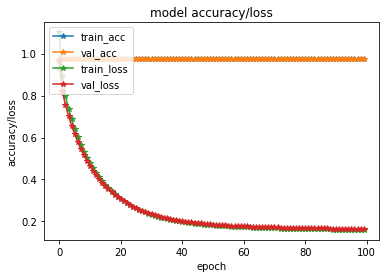

In [5]:
model = TextCNN(max_sequence_length=85, embedding_matrix=we_emb_matrix).model

train(model, model_name='TextCNN', data=[we], label=label, epochs=100, batch_size=128)

# 模型预测

In [6]:
from dataset_split import split_dataset
from train import predict_single_identification, predict_single_classification
from train import predict_multiple_identification, predict_multiple_classification

In [7]:
_, y_test = split_dataset(label)
y_test.shape

(1332, 85, 8) (333, 85, 8)


(333, 85, 8)

In [8]:
y_pred = np.load('./predict/y_pred_TextCNN.npy')
y_pred.shape

(333, 85, 8)

## 1/1

### Identification

In [9]:
event_type = ['none', 'not-none']

predict_single_identification(y_pred, y_test, event_type)


TEST_sz: 28305

Accuracy: 0.9762939409998234

              precision    recall  f1-score   support

        none     0.9763    1.0000    0.9880     27634
    not-none     0.0000    0.0000    0.0000       671

    accuracy                         0.9763     28305
   macro avg     0.4881    0.5000    0.4940     28305
weighted avg     0.9531    0.9763    0.9646     28305




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Identification + Classification

In [10]:
event_type = ['none', 'action', 'emergency', 'movement',
                  'operation', 'perception', 'stateChange', 'statement']

predict_single_classification(y_pred, y_test, labels_names=event_type)


TEST_sz: 28305

Accuracy: 0.9762939409998234

              precision    recall  f1-score   support

        none     0.9763    1.0000    0.9880     27634
      action     0.0000    0.0000    0.0000       127
   emergency     0.0000    0.0000    0.0000       119
    movement     0.0000    0.0000    0.0000        73
   operation     0.0000    0.0000    0.0000       140
  perception     0.0000    0.0000    0.0000        31
 stateChange     0.0000    0.0000    0.0000        77
   statement     0.0000    0.0000    0.0000       104

   micro avg     0.9763    0.9763    0.9763     28305
   macro avg     0.1220    0.1250    0.1235     28305
weighted avg     0.9531    0.9763    0.9646     28305
 samples avg     0.9763    0.9763    0.9763     28305




## 1/N

### Identification

In [11]:
predict_multiple_identification(y_pred, y_test)

TEST_sz: 333
Accuracy: 0.0


### Identification + Classification

In [12]:
predict_multiple_classification(y_pred, y_test)

TEST_sz: 333
Accuracy: 0.0
